In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys    
import os
path_to_module = '/content/drive/MyDrive/gas'
sys.path.append(path_to_module)
os.chdir(path_to_module)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gt_2011 = pd.read_csv('./gt_2011.csv')
gt_2012 = pd.read_csv('./gt_2012.csv')
gt_2013 = pd.read_csv('./gt_2013.csv')
gt_2014 = pd.read_csv('./gt_2014.csv')
gt_2015 = pd.read_csv('./gt_2015.csv')
features = gt_2011.columns

In [ ]:
#choose CO2
gt_2011 = gt_2011.to_numpy()[:,:-1].astype('float')
gt_2011 = np.concatenate((np.ones((len(gt_2011), 1)), gt_2011), axis=1)
gt_2012 = gt_2012.to_numpy()[:,:-1].astype('float')
gt_2012 = np.concatenate((2*np.ones((len(gt_2012), 1)), gt_2012), axis=1)
gt_2013 = gt_2013.to_numpy()[:,:-1].astype('float')
gt_2013 = np.concatenate((3*np.ones((len(gt_2013), 1)), gt_2013), axis=1)
gt_2014 = gt_2014.to_numpy()[:,:-1].astype('float')
gt_2014 = np.concatenate((4*np.ones((len(gt_2014), 1)), gt_2014), axis=1)
gt_2015 = gt_2015.to_numpy()[:,:-1].astype('float')
gt_2015 = np.concatenate((5*np.ones((len(gt_2015), 1)), gt_2015), axis=1)

In [ ]:
gt = np.concatenate((gt_2011,gt_2012,gt_2013,gt_2014,gt_2015))

# Q1

In [ ]:
#normalize data
idx = [i for i in range(1, 11)]
gt[:, idx] = (gt[:, idx] - np.mean(gt[:, idx], axis=0)) / np.std(gt[:, idx], axis=0)

# Q2

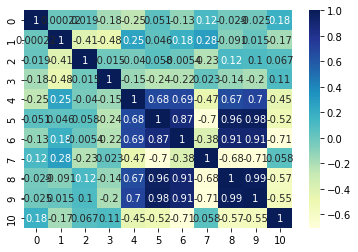

In [ ]:
import seaborn as sb
corr = np.corrcoef(gt.T)
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

From the figure above, we can see that the target is more relative to AFDP, GTEP, TIT, TEY, and CDP. At the same time, we can see AFDP, GTEP, TIT, TEY, and CDP are also highly relativeness.

# Q3

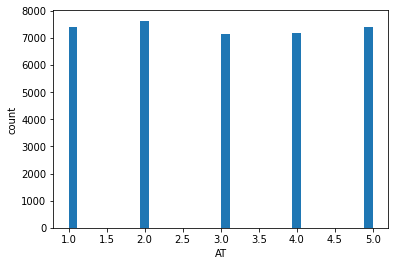

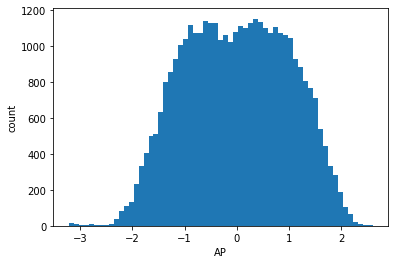

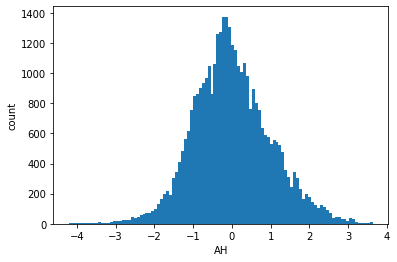

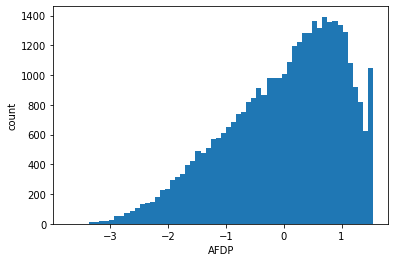

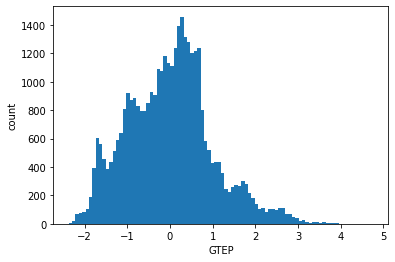

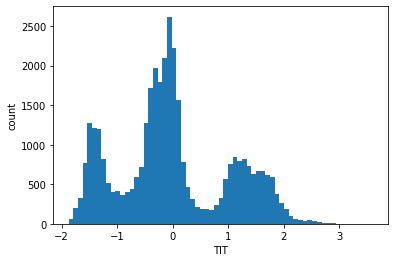

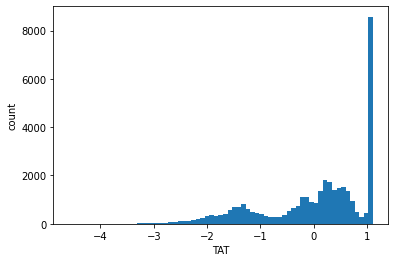

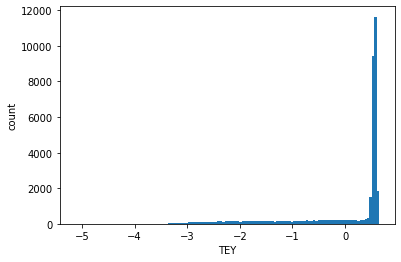

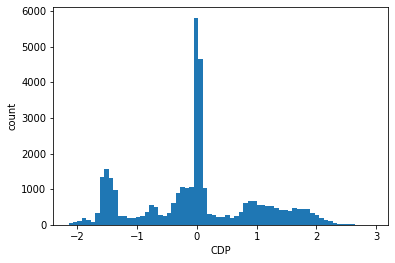

In [ ]:
features = features[:-1]
for i in range(9):
  plt.hist(gt[:, i], bins='auto')
  plt.xlabel(features[i])
  plt.ylabel('count')
  plt.show()

There are some methods for dealing with skew data. For instance, we can do log transformation, remove outliers, square root or Box Cox transformation.

# Q4

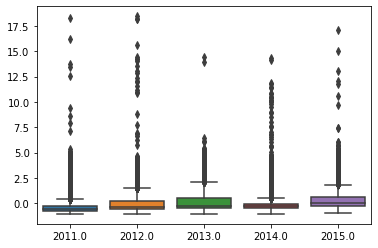

In [ ]:
data = {'year':2010+gt[:, 0], 'CO2':gt[:, -1]}
ax = sb.boxplot(x='year', y="CO2", data=data)
plt.show()

For the figure above, we can see that these features are not much relative to CO2. We can also observe that from the heapmap about correlation by Q2.

# Q6

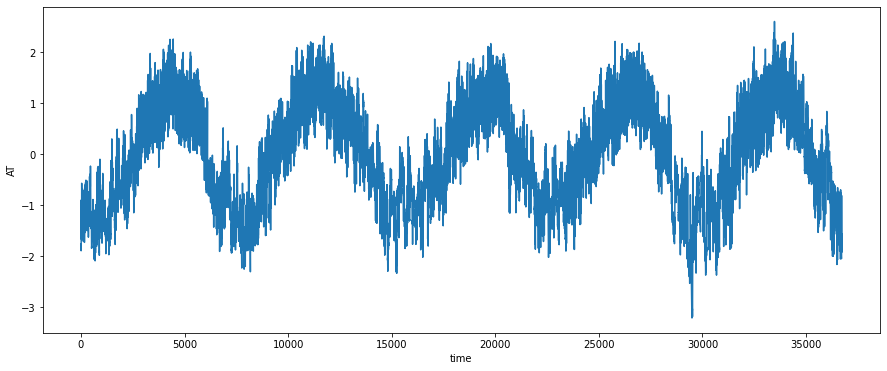

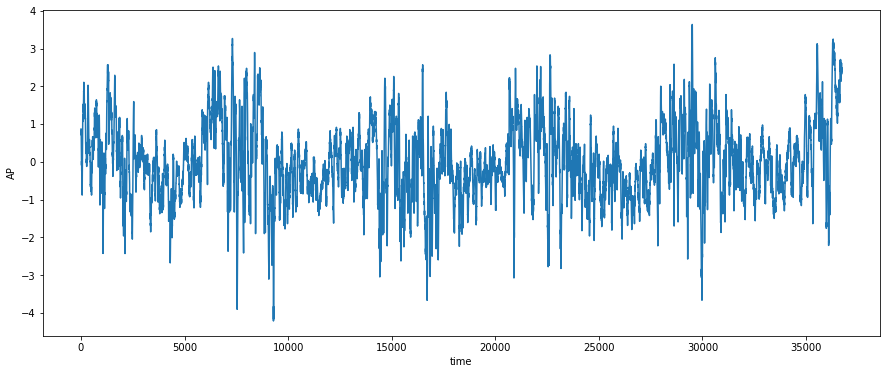

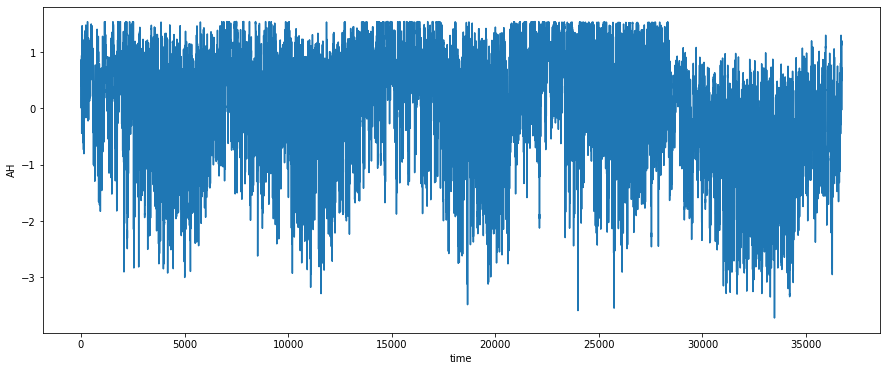

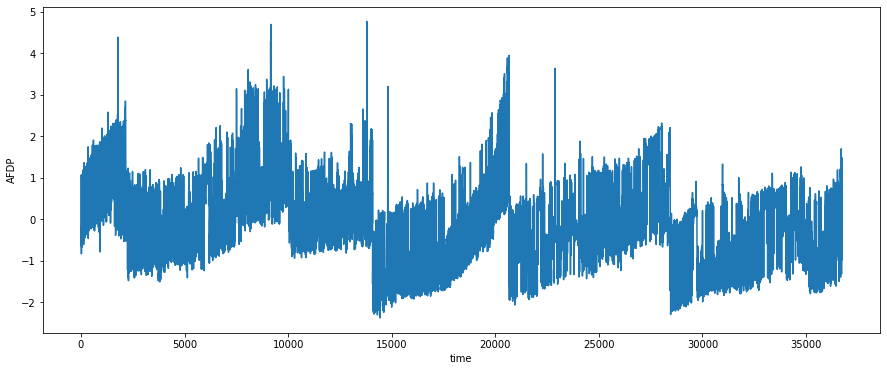

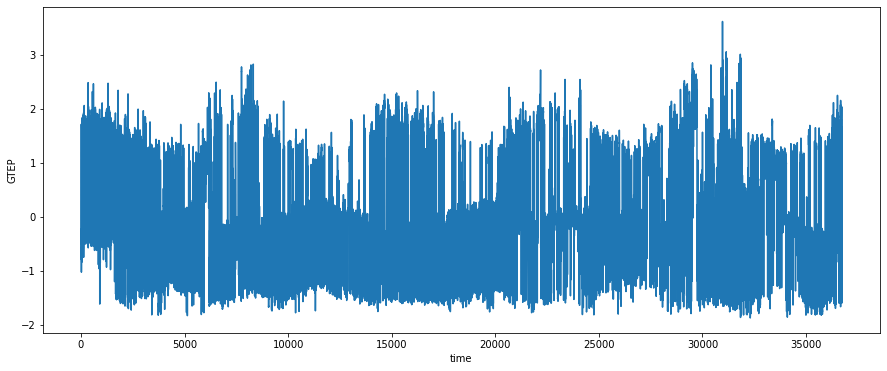

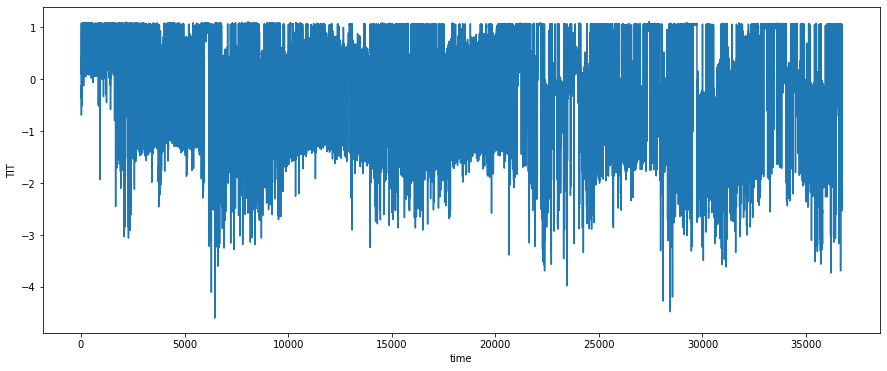

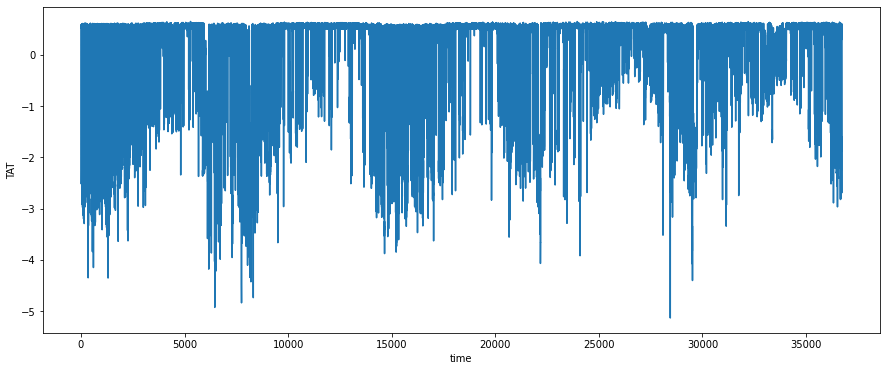

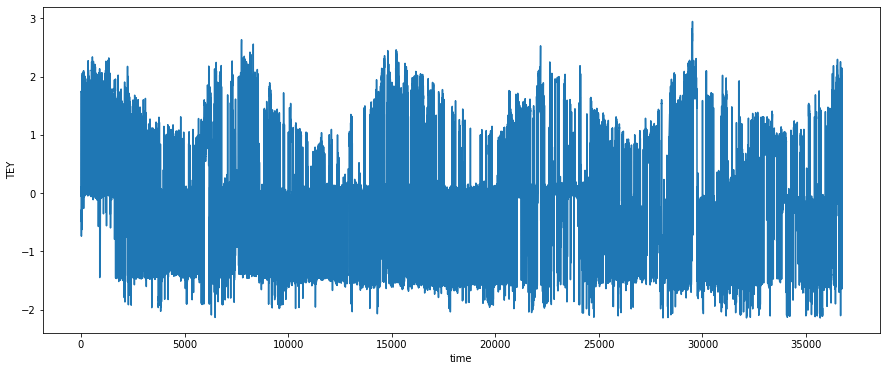

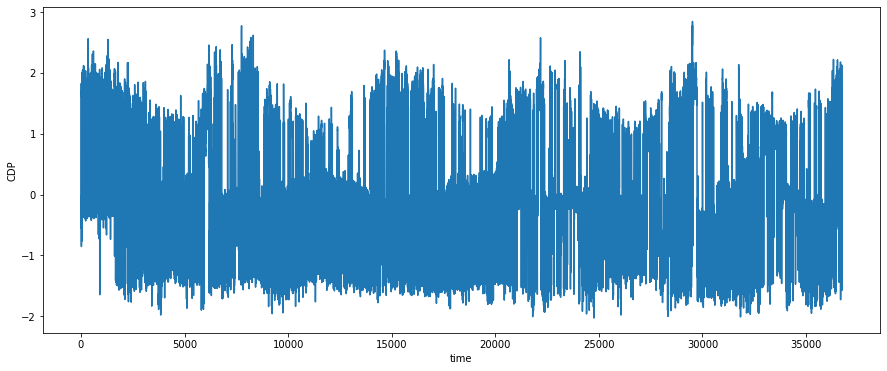

In [ ]:
for i, f in enumerate(features[:-1]):
  plt.plot(gt[:, i+1])
  plt.xlabel('time')
  plt.ylabel(f)
  plt.gcf().set_size_inches(15, 6)
  plt.show()

From the figure above, we can see that there's the same pattern every year on AT, AP and AH, which may indicate that the feature of which year is not so important.

# Q7

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
ind = [i for i in range(10)]
print('mutual_info_regression:{}'.format(mutual_info_regression(gt[:, ind], gt[:, -1])))
print('F-scores:{}'.format(f_regression(gt[:, ind], gt[:, -1])[0]))

mutual_info_regression:[0.12359336 0.10490318 0.0418297  0.02552565 0.2786647  0.44540263
 0.53698837 0.16074676 0.49587231 0.47391084]
F-scores:[ 1208.14433729  1151.22090472   165.87752857   422.08013102
  9245.08377364 13534.97054407 36558.68834551   125.50084238
 17660.02276429 16015.41677409]


In [ ]:
#feature extraction
from sklearn.model_selection import train_test_split
gt_x = gt[:, [4,5,6,8,9]]
gt_y = gt[:, -1]
gt_x_train, gt_x_test, gt_y_train, gt_y_test = train_test_split(gt_x, gt_y, test_size=0.2, random_state=42)

# Q8

linear : $\min\limits_{w}||xw-y||_{2}^{2}$

ridge : $\min\limits_{w}||xw-y||_{2}^{2}+\alpha||w||_{2}^{2}$

lasso : $\min\limits_{w}||xw-y||_{2}^{2}+\alpha||w||_{1}$

For ridge regression, the solution is more stable and the output is non-sparse. And ridge regression has analytical solution. As for lasso regression, the output could be sparse, that is to say, some features don't have influence on the model. 

# Q9

In [ ]:
#linear regression without regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lrg = LinearRegression().fit(gt_x_train, gt_y_train)
err = mean_squared_error(lrg.predict(gt_x_test), gt_y_test)
print('rmse for linear regression without regularization={}'.format(err**0.5))

rmse for linear regression without regularization=0.6960362297005847


In [ ]:
#Ridge regression
reg = {'alpha':[10**i for i in range(-5, 6)]}
rid = Ridge()
clf = GridSearchCV(estimator=rid, param_grid=reg, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf.fit(gt_x_train, gt_y_train)

print("Best Parameters: "+str(clf.best_params_))
rid = Ridge(alpha=clf.best_params_['alpha']).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rid.predict(gt_x_test), gt_y_test)
print('rmse for linear regression with ridge regularization={}'.format(err**0.5))

Best Parameters: {'alpha': 1}
rmse for linear regression with ridge regularization=0.6960464360748981


In [ ]:
las = Lasso()
clf = GridSearchCV(estimator=las, param_grid=reg, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf.fit(gt_x_train, gt_y_train)

print("Best Parameters: "+str(clf.best_params_))
las = Lasso(alpha=clf.best_params_['alpha']).fit(gt_x_train, gt_y_train)
err = mean_squared_error(las.predict(gt_x_test), gt_y_test)
print('rmse for linear regression with Lasso regularization={}'.format(err**0.5))

Best Parameters: {'alpha': 1e-05}
rmse for linear regression with Lasso regularization=0.6960388548512793


# Q10

If we don't apply regularization, then feature scaling would not influence the outcome. It would just influence on the weight of the model, but the optimization solution is the same. However, feature scaling makes influence on models with regularization. Because the weight term is in the objective function, we may sacrifice the bias to make weight smaller.

# Q11

In [ ]:
print('p-value:{}'.format(f_regression(gt[:, ind], gt[:, -1])[1]))

p-value:[1.75586548e-260 1.70122203e-248 7.10695129e-038 2.88245714e-093
 0.00000000e+000 0.00000000e+000 0.00000000e+000 4.40808602e-029
 0.00000000e+000 0.00000000e+000]


# Q12

By heatmap of correlation, the most salient feature is the TIT.

# Q13


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('clf', None),
]
)

param_grid = [{
        "poly__degree":[i for i in range(1, 7)],
        "clf__alpha":[0] + [10**i for i in range(-5, 6)],
        "clf":(
            Ridge(fit_intercept=False),
            Lasso(fit_intercept=False),
        ),
    }]

In [ ]:
cv = GridSearchCV(pipeline,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error', n_jobs=-1)
cv.fit(gt_x_train, gt_y_train)

In [ ]:
print(cv.best_params_)

{'clf': Ridge(alpha=1, fit_intercept=False), 'clf__alpha': 1, 'poly__degree': 5}


The best model is when degree is 5 and with ridge regularization with parameter 1.

Increasing the degree means the hypothesis set becomes larger, so we can fit training set better. However, this also increases the risk of overfitting and make performance on test set is bad.

Therefore, we can view the degree as a hyperparameter, and choose by cross validation.

# Q14

# Q15

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(gt_x_train, gt_y_train)
err = mean_squared_error(mlp.predict(gt_x_test), gt_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

rmse for multi-layer perceptron=0.5595110806261948


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


rmse for multi-layer perceptron=0.5595110806261948

**Why does it do much better than linear regression?** Again, MLP outperforms linear regression for gas datasets as well, since it is a complex dataset with multiple layers and neural networks such as MLP conducts back propagation to deal with non-linearities.

# Q16


In [ ]:
param_mlp = {'hidden_layer_sizes': [(100,),(200,200),(300,300,300),(300,300,200,100),(400,400,400,400)],
          'alpha': [10**i for i in range(-5, -2)], #weight decay
          }

mlp = MLPRegressor(early_stopping=True)
clf = GridSearchCV(estimator=mlp, param_grid=param_mlp, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3)
clf.fit(gt_x_train, gt_y_train)

print("Best Parameters: "+str(clf.best_params_))
mlp = MLPRegressor(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], alpha=clf.best_params_['alpha']).fit(gt_x_train, gt_y_train)
err = mean_squared_error(mlp.predict(gt_x_test), gt_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}
rmse for multi-layer perceptron=0.5560591124316742


Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}

rmse for multi-layer perceptron=0.5560591124316742

# Q17

In [ ]:
param_mlp = {'hidden_layer_sizes': [(400,400,400,400)],
          'activation': ['identity','relu','tanh','logistic'],
          'alpha': [0.0001], #weight decay
          }

mlp = MLPRegressor(early_stopping=True)
clf = GridSearchCV(estimator=mlp, param_grid=param_mlp, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
clf.fit(gt_x_train, gt_y_train)

print("Best Parameters: "+str(clf.best_params_))
mlp = MLPRegressor(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], activation=clf.best_params_['activation'], alpha=clf.best_params_['alpha']).fit(gt_x_train, gt_y_train)
err = mean_squared_error(mlp.predict(gt_x_test), gt_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}
rmse for multi-layer perceptron=0.5184101375089821


**What activation function should be used for the output?** From above, "ReLU" is the best activation function.

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}

rmse for multi-layer perceptron=0.5184101375089821

# Q18

Refer to diamonds answer.

# Q19

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {"max_depth": [2,4,8,16, None],
            "n_estimators":[50,100,200,300,400,500],
            "max_features": [0.1, 0.25, 0.5, 0.75, 1.0],}

rfr = RandomForestRegressor()
clf = GridSearchCV(estimator=rfr, param_grid=param_rfr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
clf.fit(gt_x_train, gt_y_train)

print("Best Parameters: "+str(clf.best_params_))
rfr = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], n_estimators=clf.best_params_['n_estimators'], max_features=clf.best_params_['max_features']).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))

Fitting 3 folds for each of 150 candidates, totalling 450 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Parameters: {'max_depth': None, 'max_features': 0.5, 'n_estimators': 200}
rmse for Random Forest Regressor=0.5186939368408344


Best Parameters: {'max_depth': None, 'max_features': 0.5, 'n_estimators': 200}

rmse for Random Forest Regressor=0.5186939368408344

**Explain how these hyper-parameters affect the overall performance?**
***max_depth*** - For max_depth=[4, 8, 12, 16, 32, None] with remaining parameters kept at best paramater values, the RMSE scores were RMSE=[0.630, 0.551, 0.533, 0.522, 0.522, 0.519]. From this, one can observe that whilst increasing max_depth value has less impact after max_depth=16, changing the values of max_depth still has a significant impact on the performance scores at lower values. 
***max_features*** - The impact of altering the maximum features on the RMSE score is less compared to the other hyperparameters. The best is at 50% of n_features however, changing this value has small impact. When tested with max_features=[0.25, 0.50, 0.75, 1.0] while the remaining parameters were set at best parameter values, the RMSE scores were [0.542, 0.519, 0.520, 0.521]. This indicates that while minimum RMSE is achieved when max_features are approximately 50-75%, altering them to values outside this range does not have much impact as compared to changing max_depth.
***n_estimators*** - As seen with the diamonds dataset, the impact of altering the number of estimators is also less compared to that of the maximum depth. When experimenting with n_estimators=[10,50,100,200] and the rest parameters taking the best parameter values, the RMSE scores were (in corresponding order) [0.541, 0.530, 0.527, 0.522], which indicates that after n_estimators=100, the RMSE score plateaus. 
**Do some of them have regularization effect?**
In overall, max_depth has a regularization effect since it is able to tune the complexity of the tree and adjust between under-fitting and over-fitting. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=16, n_estimators=200, max_features=0.5).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))
rfr = RandomForestRegressor(max_depth=32, n_estimators=200, max_features=0.5).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))
rfr = RandomForestRegressor(max_depth=8, n_estimators=200, max_features=0.5).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))

rmse for Random Forest Regressor=0.522265121111036
rmse for Random Forest Regressor=0.521875120849809
rmse for Random Forest Regressor=0.5513274786710335


In [ ]:
rfr = RandomForestRegressor(max_depth=12, n_estimators=200, max_features=0.5).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))
rfr = RandomForestRegressor(max_depth=4, n_estimators=200, max_features=0.5).fit(gt_x_train, gt_y_train)
err = mean_squared_error(rfr.predict(gt_x_test), gt_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))

rmse for Random Forest Regressor=0.5333056552360366
rmse for Random Forest Regressor=0.629693120252785


# Q20

Refer to answer on diamonds dataset.

# Q21

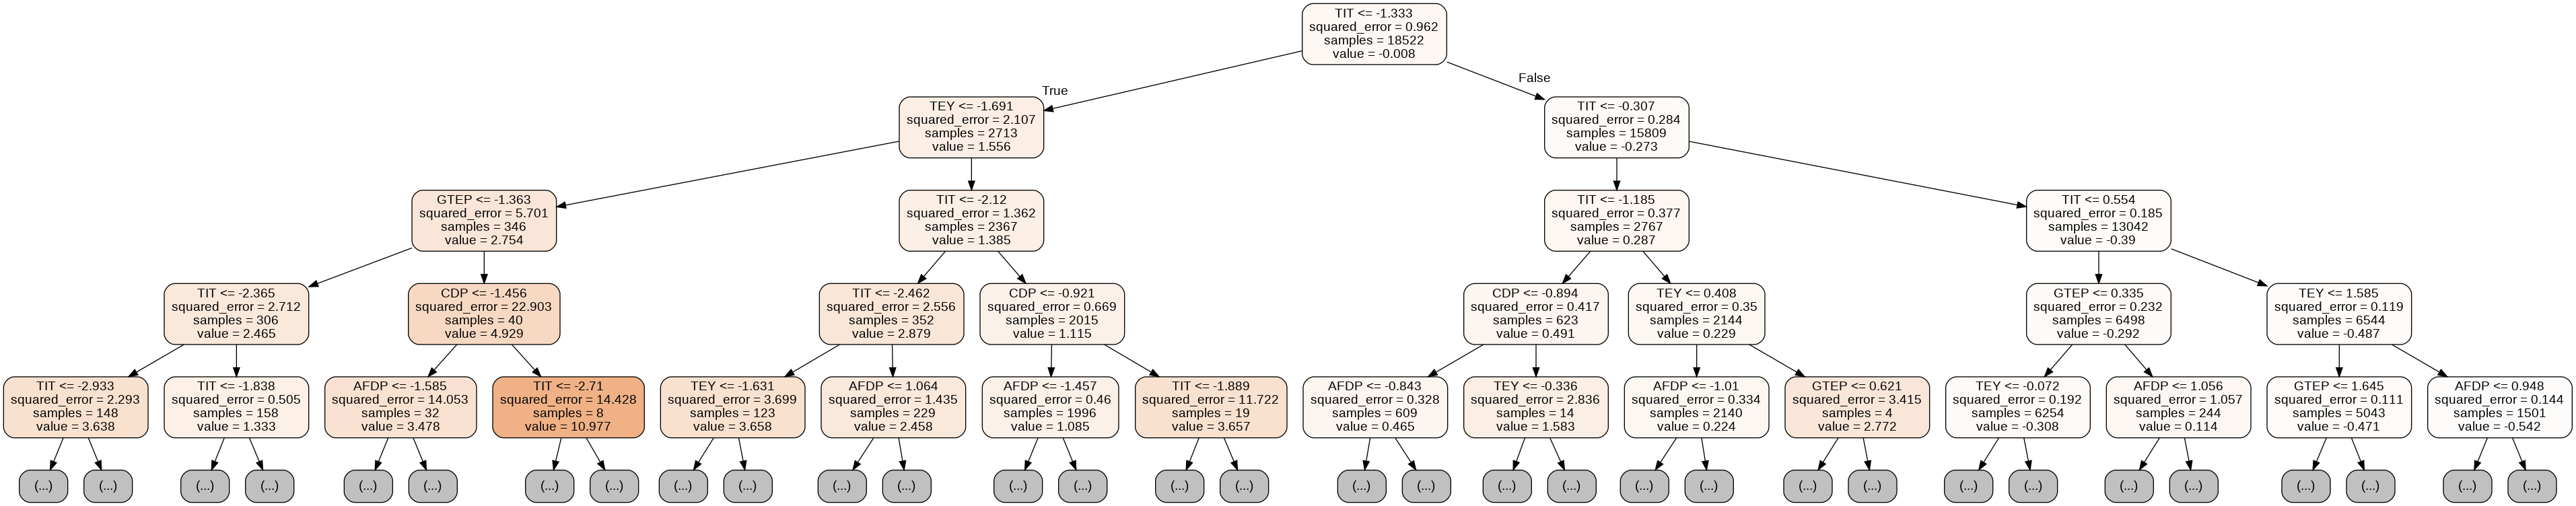

In [ ]:
from sklearn.tree import export_graphviz

estimator = rfr.estimators_[0]
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = ["AFDP","GTEP", "TIT", "TEY" ,"CDP"],
                rounded = True, proportion = False, 
                max_depth = 4,
                filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

**Which feature is selected for branching at the root node?** At the root node, "TIT" is selected as the branching feature.

**What can you infer about the importance of features?**
As "TIT" is used in the root node and also mainly used in depth 1,2,3 one can observe that "TIT" is the most distinguishing feature out of all. The next important features are "GTEP", "TEY", "CDP" as they are also used in the first 3 depths. In the 4th layer, one observes the emergence of the remaining branching feature, "AFDP" as well.

# Q22-24: Skipped (Refer to Diamonds)

# Q25

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import absolute
from numpy import mean
from numpy import sqrt 

kf = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
# Linear Regression
lrg = LinearRegression()
scores = cross_validate(lrg, gt_x_train, gt_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Linear Regression train set={}'.format(train_rmse))
print('rmse for Linear Regression validation set={}'.format(test_rmse))

rmse for Linear Regression train set=0.6626296054379304
rmse for Linear Regression validation set=0.6604983770366001


In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=5)
gt_x_train_poly = poly.fit_transform(gt_x_train)
gt_x_test_poly = poly.fit_transform(gt_x_test)
lrg = Ridge(alpha=1, fit_intercept=False).fit(gt_x_train_poly, gt_y_train)
scores = cross_validate(lrg, gt_x_train_poly, gt_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Polynomial Regression train set={}'.format(train_rmse))
print('rmse for Polynomial Regression validation set={}'.format(test_rmse))

rmse for Polynomial Regression train set=0.5329308808186568
rmse for Polynomial Regression validation set=0.5564554351254646


In [ ]:
# Neural Network
mlp = MLPRegressor(early_stopping=True, activation='relu', alpha=0.0001, hidden_layer_sizes=(400,400,400,400))
scores = cross_validate(mlp, gt_x_train, gt_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Neural Network train set={}'.format(train_rmse))
print('rmse for Neural Network validation set={}'.format(test_rmse))

rmse for Neural Network train set=0.4960347738960905
rmse for Neural Network validation set=0.5306114733674373


In [ ]:
# Random Forest
rfr = RandomForestRegressor(max_depth=8, max_features=0.75, n_estimators=200, oob_score=True, warm_start=True)
scores = cross_validate(rfr, gt_x_train, gt_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True, return_estimator=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Random Forest Regressor train set={}'.format(train_rmse))
print('rmse for Random Forest Regressor validation set={}'.format(test_rmse))

rmse for Random Forest Regressor train set=0.4383951239831803
rmse for Random Forest Regressor validation set=0.5403582124024631


In [ ]:
oob_error = 1-np.mean([i.oob_score_ for i in scores['estimator']])
print('Out of Bag Error={}'.format(oob_error))

Out of Bag Error=0.3029522093477166


# Q26

From above, Out of Bag Error=0.3029522093477166 and Out of Bag Score=0.6970477906522834. For explanation on OOB score and R2, refer to the answer on diamonds dataset.